<a href="https://colab.research.google.com/github/trishnak99/ai_colab_2/blob/master/hw2_problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Loading the CIFAR10 data set

In [3]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_images, train_labels, test_images, test_labels

170500096/170498071 [==============================] - 2s 0us/step


(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [0]:
train_images_norm = train_images.astype('float32')
test_images_norm = test_images.astype('float32')
train_images_norm = train_images_norm / 255.0
test_images_norm = test_images_norm / 255.0

##Create graphs

In [0]:
def graphAcc(history):
  history_dict = history.history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']
  epochs_range = range(1, epochs+1)

  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def graphLoss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']
  epochs_range = range(1, epochs + 1)
  
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

##Build underfit

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 246us/sample - loss: 2.2927 - acc: 0.1143 - val_loss: 2.2498 - val_acc: 0.1492
Epoch 2/20
50000/50000 [==============================] - 12s 237us/sample - loss: 2.2168 - acc: 0.1535 - val_loss: 2.1744 - val_acc: 0.1924
Epoch 3/20
50000/50000 [==============================] - 12s 238us/sample - loss: 2.1560 - acc: 0.2001 - val_loss: 2.1005 - val_acc: 0.2292
Epoch 4/20
50000/50000 [==============================] - 13s 262us/sample - loss: 2.0183 - acc: 0.2458 - val_loss: 1.9768 - val_acc: 0.2519
Epoch 5/20
50000/50000 [==============================] - 13s 257us/sample - loss: 1.8946 - acc: 0.2758 - val_loss: 2.0317 - val_acc: 0.2167
Epoch 6/20
50000/50000 [==============================] - 12s 241us/sample - loss: 1.8076 - acc: 0.3053 - val_loss: 2.0275 - val_acc: 0.2348
Epoch 7/20
50000/50000 [==============================] - 11s 230us/sample - loss: 1.7376 - acc: 0.3282 

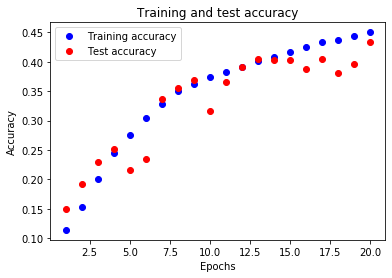

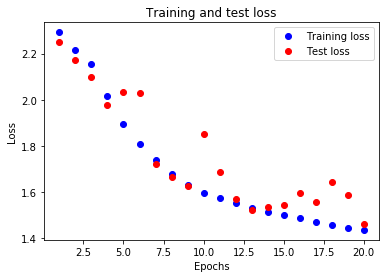

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(2, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(5, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

epochs = 20
history = model.fit(train_images_norm, train_labels, epochs=epochs, validation_data=(test_images_norm, test_labels), verbose=1)
loss, acc = model.evaluate(test_images_norm, test_labels, verbose=1)

graphAcc(history)
graphLoss(history)

##Build overfit

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 351us/sample - loss: 1.6805 - acc: 0.3959 - val_loss: 1.4615 - val_acc: 0.4786
Epoch 2/50
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3524 - acc: 0.5191 - val_loss: 1.2895 - val_acc: 0.5393
Epoch 3/50
50000/50000 [==============================] - 15s 306us/sample - loss: 1.1845 - acc: 0.5834 - val_loss: 1.2587 - val_acc: 0.5354
Epoch 4/50
50000/50000 [==============================] - 15s 306us/sample - loss: 1.0625 - acc: 0.6284 - val_loss: 1.1151 - val_acc: 0.6036
Epoch 5/50
50000/50000 [==============================] - 15s 304us/sample - loss: 0.9706 - acc: 0.6635 - val_loss: 1.0251 - val_acc: 0.6478
Epoch 6/50
50000/50000 [==============================] - 15s 303us/sample - loss: 0.8979 - acc: 0.6863 - val_loss: 0.9649 - val_acc: 0.6659
Epoch 7/50
50000/50000 [==============================] - 15s 297us/sample - loss: 0.8290 - acc: 0.7133 

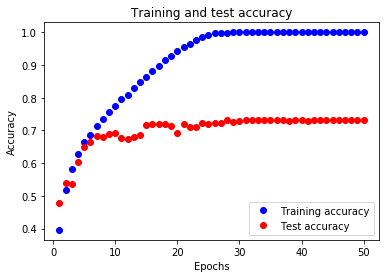

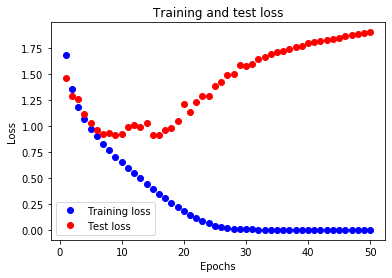

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

epochs = 50
history = model.fit(train_images_norm, train_labels, epochs=epochs, validation_data=(test_images_norm, test_labels), verbose=1)
loss, acc = model.evaluate(test_images_norm, test_labels, verbose=1)

graphAcc(history)
graphLoss(history)

##Build good fit

Epoch 1/60
781/781 [==============================] - 13s 17ms/step - loss: 1.9584 - acc: 0.2867 - val_loss: 1.6251 - val_acc: 0.4212
Epoch 2/60
781/781 [==============================] - 14s 18ms/step - loss: 1.6192 - acc: 0.4143 - val_loss: 1.4691 - val_acc: 0.4761
Epoch 3/60
781/781 [==============================] - 14s 18ms/step - loss: 1.4832 - acc: 0.4633 - val_loss: 1.4591 - val_acc: 0.4724
Epoch 4/60
781/781 [==============================] - 13s 16ms/step - loss: 1.3784 - acc: 0.4967 - val_loss: 1.2850 - val_acc: 0.5382
Epoch 5/60
781/781 [==============================] - 13s 16ms/step - loss: 1.3046 - acc: 0.5296 - val_loss: 1.2129 - val_acc: 0.5664
Epoch 6/60
781/781 [==============================] - 13s 16ms/step - loss: 1.2485 - acc: 0.5485 - val_loss: 1.1491 - val_acc: 0.5940
Epoch 7/60
781/781 [==============================] - 13s 16ms/step - loss: 1.1857 - acc: 0.5751 - val_loss: 1.2119 - val_acc: 0.5736
Epoch 8/60
781/781 [==============================] - 13s 16ms

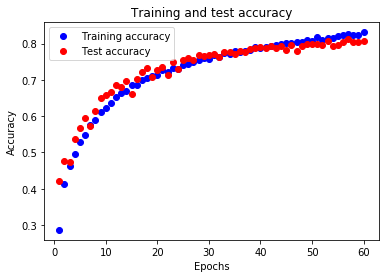

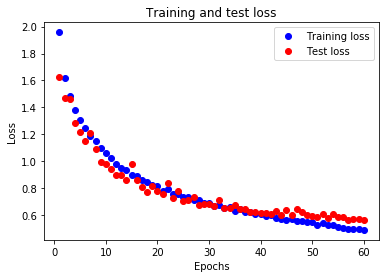

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.23),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.34),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

epochs = 60

dg = ImageDataGenerator(horizontal_flip=True)
it_train = dg.flow(train_images_norm, train_labels, batch_size=32)
steps = int(train_images_norm.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images_norm, test_labels), verbose=1)
loss, acc = model.evaluate(test_images_norm, test_labels, verbose=1)

graphAcc(history)
graphLoss(history)